# Task
Create a CNN model to classify potato diseases using the dataset at "gs://cloud-ai-platform-ci-artifacts/datasets/potato-disease-kaggle/potato-disease.zip".

## Load and explore data

### Subtask:
Load the potato disease dataset and perform initial exploration to understand its structure and content.


## Load and explore data

### Subtask:
Retry loading and exploring the potato disease dataset, addressing the previous authentication errors encountered when accessing the Google Cloud Storage bucket.


**Reasoning**:
Attempt to load and explore the potato disease dataset from GCS using gcsfs, handling potential authentication errors.



In [9]:
import os

example_image_path = '/content/potato-disease/PotatoDiseaseClassification-main/leaves-images-dataset/Potato___Early_blight/002d50d4-7e10-4160-b54f-b6453e06e718.jpg'

if os.path.exists(example_image_path):
    print(f"The file exists at: {example_image_path}")
else:
    print(f"Error: The file was not found at: {example_image_path}")
    # Optionally, list files in the directory to debug
    # import glob
    # print("Files in the directory:")
    # print(glob.glob(os.path.dirname(example_image_path) + '/*'))

Error: The file was not found at: /content/potato-disease/PotatoDiseaseClassification-main/leaves-images-dataset/Potato___Early_blight/002d50d4-7e10-4160-b54f-b6453e06e718.jpg


In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define image dimensions and batch size
IMG_HEIGHT = 150
IMG_WIDTH = 150
BATCH_SIZE = 32

# Define the directory containing the extracted dataset
data_dir = 'potato-disease/PotatoDiseaseClassification-main/leaves-images-dataset'

# Create data generators for training, validation, and test sets
# Using 80% for training, 10% for validation, and 10% for testing

# Generator for training and validation data with augmentation and split
train_val_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Split for validation from the training data
)

train_generator = train_val_datagen.flow_from_directory(
    data_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training' # Specify training subset
)

validation_generator = train_val_datagen.flow_from_directory(
    data_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation' # Specify validation subset
)

# Create a separate generator for the test set without data augmentation
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    data_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False # Keep the order for evaluation
)

print("Data preprocessing complete.")

# Define the number of classes
num_classes = len(train_generator.class_indices)

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.summary()
print("CNN model built successfully.")

Found 1722 images belonging to 3 classes.
Found 430 images belonging to 3 classes.
Found 2152 images belonging to 3 classes.
Data preprocessing complete.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,035,203 (72.61 MB)

 Trainable params: 19,035,203 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

CNN model built successfully.


In [13]:
from tensorflow.keras.optimizers import Adam

# Compile the model
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define the number of training and validation steps
steps_per_epoch = train_generator.samples // BATCH_SIZE + (train_generator.samples % BATCH_SIZE != 0)
validation_steps = validation_generator.samples // BATCH_SIZE + (validation_generator.samples % BATCH_SIZE != 0)

# Train the model
epochs = 10  # You can adjust the number of epochs as needed
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_steps
)

print("Model compiled and training complete.")

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 119s 2s/step - accuracy: 0.4824 - loss: 1.4709 - val_accuracy: 0.7186 - val_loss: 0.6445
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.7524 - loss: 0.6123 - val_accuracy: 0.8395 - val_loss: 0.4264
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.8643 - loss: 0.3666 - val_accuracy: 0.9000 - val_loss: 0.2279
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 116s 2s/step - accuracy: 0.9124 - loss: 0.2386 - val_accuracy: 0.8721 - val_loss: 0.2991
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 119s 2s/step - accuracy: 0.9259 - loss: 0.2311 - val_accuracy: 0.9209 - val_loss: 0.2114
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.9243 - loss: 0.1781 - val_accuracy: 0.9256 - val_loss: 0.1840
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.9423 - loss: 0.1524 - val_accuracy: 0.9605 - val_loss: 0.1331
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 117s 2s/step - accuracy: 0.9391 - loss: 0.1552 - val_accuracy: 0.9651 - v

In [18]:
history

In [19]:
history.params

{'verbose': 'auto', 'epochs': 10, 'steps': 54}

In [20]:
history.history.keys()
#loss, accuracy, val loss etc are a python list containing values of loss, accuracy etc at the end of each epoch

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [21]:
type(history.history['loss'])

list

In [22]:
len(history.history['loss'])

10

In [23]:
history.history['loss'][:5]
# show loss for first 5 epochs

[1.035284399986267,
 0.5628692507743835,
 0.32730987668037415,
 0.26222947239875793,
 0.19255420565605164]

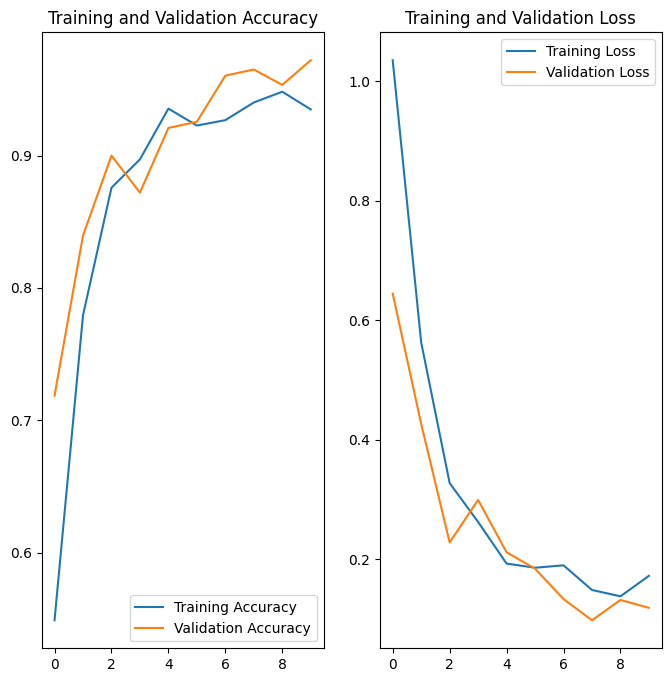

In [27]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(epochs), acc, label='Training Accuracy')
plt.plot(range(epochs), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(epochs), loss, label='Training Loss')
plt.plot(range(epochs), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
predicted label: Potato___Early_blight


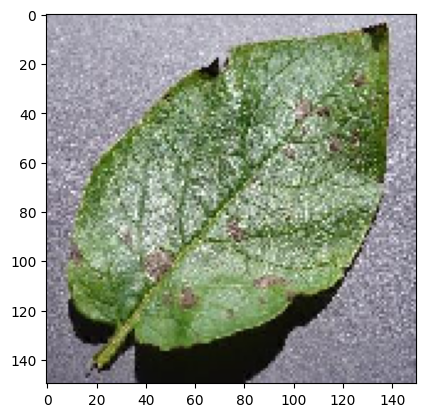

In [30]:
#Run prediction on a sample image
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Get a batch of images and labels from the test generator
images_batch, labels_batch = next(test_generator)

# Take the first image and its label from the batch
first_image = images_batch[0]
first_label = labels_batch[0]

# Assuming class_names are available from the generator
# If not, you might need to define them manually based on your directory names
class_names = list(test_generator.class_indices.keys())


print("first image to predict")
plt.imshow(first_image)
print("actual label:",class_names[np.argmax(first_label)])

batch_prediction = model.predict(np.expand_dims(first_image, axis=0))
print("predicted label:",class_names[np.argmax(batch_prediction[0])])

Saving e.PNG to e (3).PNG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Uploaded image: e (3).PNG


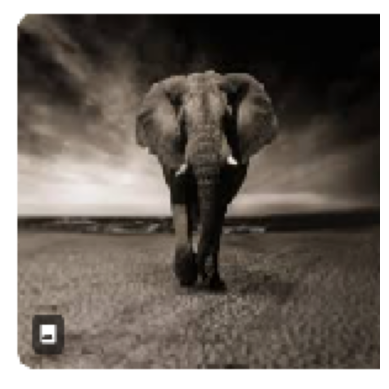

Prediction confidence for each class:
  Potato___Early_blight: 40.34%
  Potato___Late_blight: 59.66%
  Potato___healthy: 0.00%

Highest confidence: 59.66%
Prediction is below the confidence threshold (65.00%) - Consider as uncertain.


In [42]:
from google.colab import files
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Define a confidence threshold (adjust as needed)
confidence_threshold = 0.65  # Example: 75% confidence

uploaded = files.upload()

for fn in uploaded.keys():
  # Get the path to the uploaded file
  img_path = fn

  # Make a prediction using the predict_image function
  predictions = predict_image(model, img_path, (IMG_HEIGHT, IMG_WIDTH))

  # Get the class labels from the test generator
  class_labels = list(test_generator.class_indices.keys())

  print(f"Uploaded image: {img_path}")

  # Display the uploaded image
  img = image.load_img(img_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
  plt.imshow(img)
  plt.axis('off')
  plt.show()

  # Interpret the predictions and display confidence for all classes
  print("Prediction confidence for each class:")
  for i in range(len(class_labels)):
      print(f"  {class_labels[i]}: {predictions[0][i]*100:.2f}%")

  predicted_class_index = np.argmax(predictions)
  predicted_class = class_labels[predicted_class_index]
  confidence = np.max(predictions) * 100

  print(f"\nHighest confidence: {confidence:.2f}%")

  if confidence >= confidence_threshold * 100:
      print(f"Predicted class (above threshold): {predicted_class}")
  else:
      print(f"Prediction is below the confidence threshold ({confidence_threshold*100:.2f}%) - Consider as uncertain.")

In [32]:
# The predict_image function is defined in a previous cell (NDO2AsOaec1a or 97b2d7fa)
# We will reuse it here.

# Make sure the predict_image function and necessary imports are available in the environment
# (from cell 97b2d7fa or NDO2AsOaec1a)

# Example of the predict_image function (if needed for context, but it should be available)
# def predict_image(model, img_path, target_size):
#     img = image.load_img(img_path, target_size=target_size)
#     img_array = image.img_to_array(img)
#     img_array = np.expand_dims(img_array, axis=0)  # Create a batch
#     img_array /= 255.0  # Rescale pixel values
#     predictions = model.predict(img_array)
#     return predictions

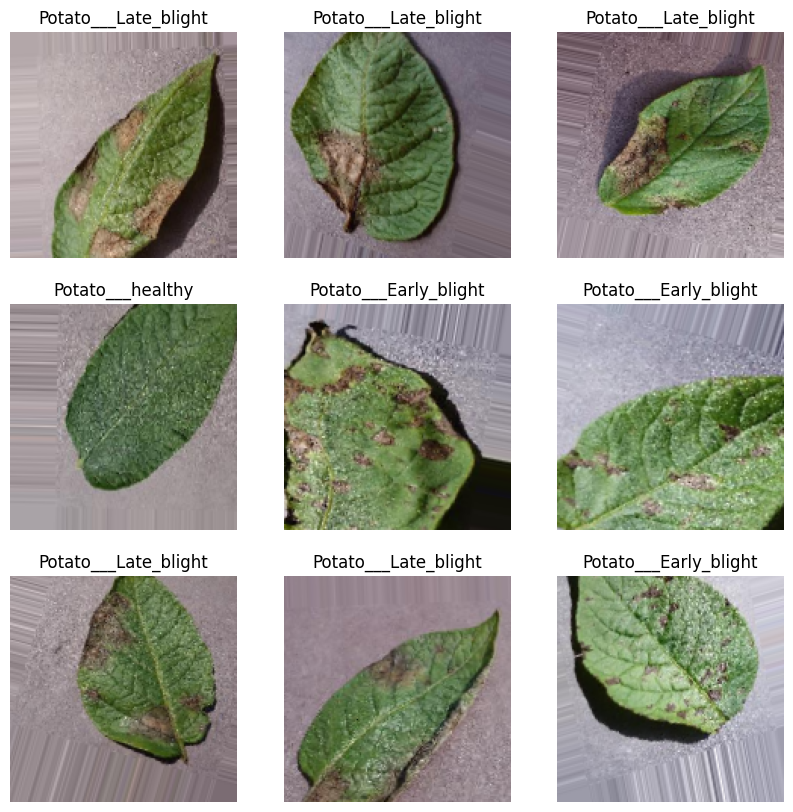

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# Get a batch of images and labels from the training generator
# We can use the training generator as it represents the dataset structure
images, labels = next(train_generator)

# Get class names
class_names = list(train_generator.class_indices.keys())

# Display a few images with their labels
plt.figure(figsize=(10, 10))
for i in range(9): # Displaying the first 9 images in the batch
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    # Find the class index with the highest probability
    predicted_class_index = np.argmax(labels[i])
    plt.title(class_names[predicted_class_index])
    plt.axis("off")
plt.show()